This notebook demonstrates the pipeline for using the linear method to perform site response analysis.

In [1]:
from PySeismoSoil.class_Vs_profile import Vs_Profile
from PySeismoSoil.class_ground_motion import Ground_Motion
from PySeismoSoil.class_simulation import Linear_Simulation

The linear method assumes the properties of soil layers do not change over time, no matter how strong the input motion is. Therefore, we only need the soil profile and the input ground motion:

In [2]:
soil_profile = Vs_Profile('../PySeismoSoil/tests/files/profile_FKSH14.txt')
input_motion = Ground_Motion('../PySeismoSoil/tests/files/sample_accel.txt', unit='cm/s/s')

(`Vs_Profile` class: [documentation](https://pyseismosoil.readthedocs.io/en/stable/api_docs/class_Vs_profile.html) and [examples](./Demo_02_Vs_Profile.ipynb). `Ground_Motion` class: [documentations](https://pyseismosoil.readthedocs.io/en/stable/api_docs/class_ground_motion.html) and [examples](./Demo_01_Ground_Motion.ipynb).)


----------+----------+-------------+------------------+--------------
  Thk [m] | Vs [m/s] | Damping [%] | Density [kg/m^3] | Material No. 
----------+----------+-------------+------------------+--------------
   2.00   |  120.0   |    2.000    |      1466.0      |      1       
   6.00   |  190.0   |    2.000    |      1900.0      |      2       
  44.00   |  280.0   |    2.000    |      1900.0      |      3       
  54.00   |  1030.0  |    2.000    |      2125.0      |      4       
   9.00   |  1210.0  |    1.000    |      2243.0      |      5       
   0.00   |  1210.0  |    1.000    |      2243.0      |      0       
----------+----------+-------------+------------------+--------------

(Vs30 = 236.6 m/s)



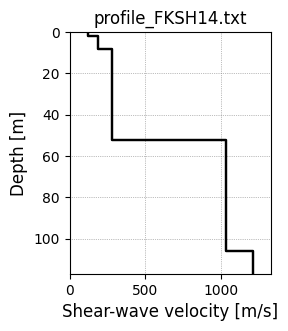

In [3]:
soil_profile.summary()

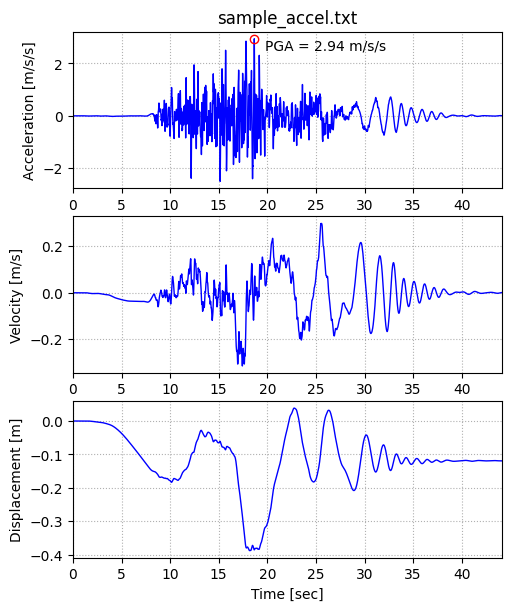

In [4]:
input_motion.plot();

Initialize a `Linear_Simulation` object. We use an "elastic" boundary condition in this example, which means that the input ground motion is the ground motion on a nearby reference rock site (or "rock outcrop site"). (If the input ground motion is the motion recorded in a borehole at the bottom of the $V_S$ profile, then use "rigid" as the boundary condition.)

In [5]:
lin_sim = Linear_Simulation(soil_profile, input_motion, boundary='elastic')

Then run the simulation with the `run()` method:

Linear site response simulation running... done.


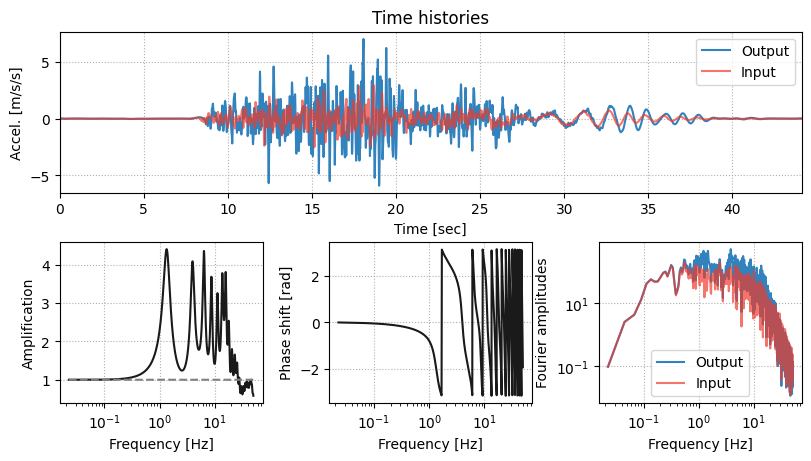

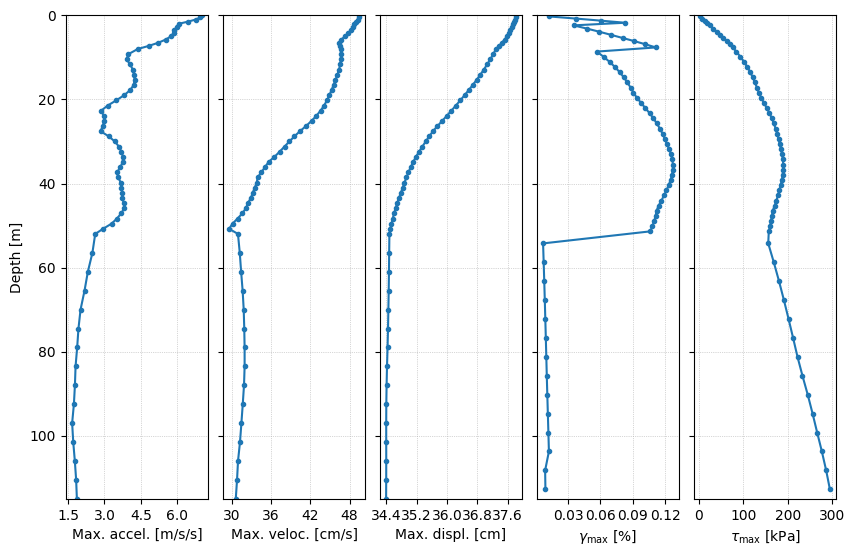

In [6]:
sim_results_1 = lin_sim.run(show_fig=True, every_layer=True)

The figure above is the profile of maximum acceleration, velocity, displacement, shear strain, and shear stress during the whole duration of shaking.

We can set the parameter `every_layer` to `False`, which only calculates the ground motion on the soil surface, so is faster.

Linear site response simulation running... done.


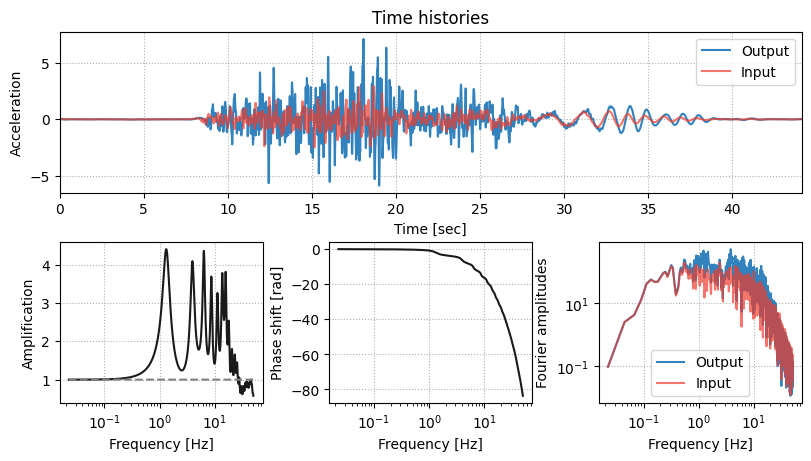

In [7]:
sim_results_2 = lin_sim.run(show_fig=True, every_layer=False);

We can see that the result (on the soil surface) is the same as above.

`sim_results_1` and `sim_results_2` are objects of `Simulation_Results` class. You can save these simulation results to the hard drive like this:

```python
>>> sim_results_1.to_txt()
```

To also save the figures (input/output ground motion, maximum accel/veloc/displ/strain/stress profiles), use the `plot()` method:

```python
>>> sim_results_2.plot(dpi=200, save_fig=True)
```

For more information about the `Simulation_Results` class, see its [documentation](https://pyseismosoil.readthedocs.io/en/stable/api_docs/class_simulation_results.html).